# Tarea semanal 3

Yanina Corsaro

1- Se pide diseñar un bloque cuantizador (ADC) que opere sobre una señal discreta en tiempo sR, para convertirla en sQ.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sen import mi_funcion_sen
import scipy.signal as sig

def ADC(sr, Vf, bits):  
    
    #calculamos paso de cuantización
    q = Vf/(2**(bits-1))
    #cuantizamos la señal sr y normalizamos para que quede comprendida entre -Vf y +Vf
    sq= np.rint(sr/q)*q

    return sq



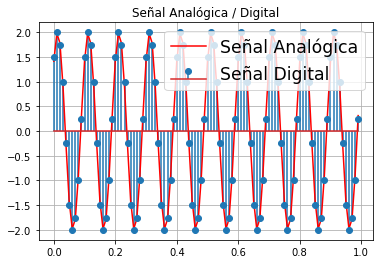

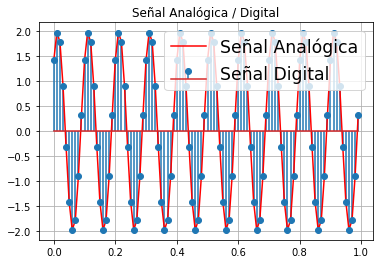

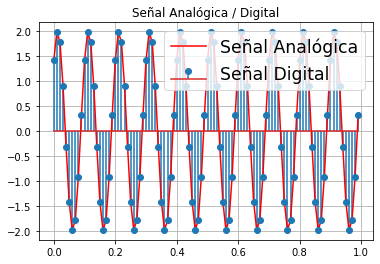

In [66]:
# parámetros de la función seno

N  = 100 # muestras
fs = 100 # Hz
p0 = np.pi/4# radianes
f0 = 10    # Hz
V = 2  # Volt

tt, xx= mi_funcion_sen( vmax=V , dc=0 , ff=f0 , ph=p0, nn=N , fs=fs )

# obtenemos sq para 4, 8 y 16 bits

bit = [4,8,16]

for b in bit:
    # graficamos cada sq con la señal original sr para comparar
    fig, ax = plt.subplots()
    ax.set_title('Señal Analógica / Digital')
    ax.plot(tt,xx,'r',label='Señal Analógica')
    ax.stem(tt, ADC(sr=xx,Vf=V,bits=b), use_line_collection = True, label='Señal Digital')
    ax.grid()
    ax.legend(loc='upper right', fontsize = 'xx-large')
    


plt.show()



En los gráficos vemos que las señales coinciden bastante, el error es casi imperceptible a esta escala. En el siguiente punto vamos a analizar el error a menor escala para notar la diferencia.

2- Analizamos la señal de error e = sq-sr.

bits :  4
mean :  -5.60662627435704e-17
var :  0.004282090960523988
bits :  8
mean :  -5.60662627435704e-17
var :  2.126504830693624e-05
bits :  16
mean :  -5.60662627435704e-17
var :  5.882301754361771e-10


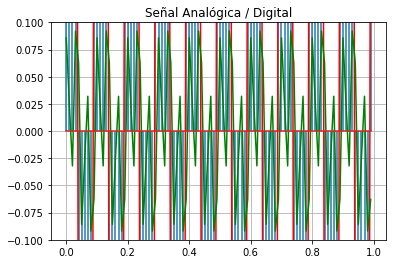

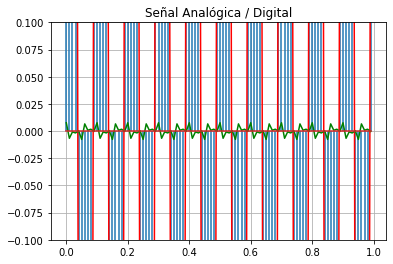

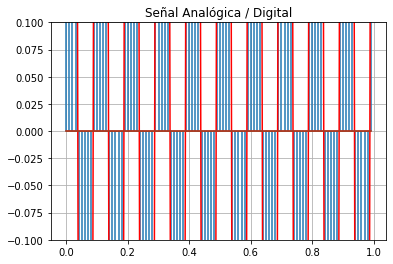

In [67]:
for b in bit:
    sr = xx
    sq = ADC(sr=xx,Vf=V,bits=b)
    e = sq-sr
    e_var = np.var(e)
    e_mean = np.mean(e)
    e_corr = sig.correlate(e,e)
    print ("bits : ", b)
    print ("mean : ", e_mean)
    print("var : ", e_var)
    
    # graficamos cada sq con la señal original sr para comparar
    fig, ax = plt.subplots()
    ax.set_title('Señal Analógica / Digital')
    # Grafico la señal analógica en rojo
    ax.plot(tt,xx,'r',label='Señal Analógica')
    # Grafico el error en verde
    ax.plot(tt,e,'g',label='Error')
    ax.stem(tt, sq, use_line_collection = True, label='Señal Digital')
    ax.set_ylim([-0.1, 0.1])
    ax.grid()
    


plt.show()


Podemos observar que el valor medio es el mismo para los 3 casos (independientemente de los bits, y muy cercano a 0), pero cuanto mayor la cantidad de bits menor la varianza, con lo cual el error es menor (varía menos). 